In [11]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from dotenv import load_dotenv
from langchain_google_genai import ChatGoogleGenerativeAI
import os

In [12]:
load_dotenv()
api_key = os.getenv("GEMINI_API_KEY")

In [13]:
model = ChatGoogleGenerativeAI(
    model= "gemini-2.5-flash",
    temperature=1.0,
    max_retries=2,
    google_api_key=api_key,
)

In [14]:
class BlogState(TypedDict):
    topic: str
    outline: str
    blog: str
    evaluation: str

In [15]:
def get_outline(state:BlogState):
    prompt = f"Create a detailed outline for a 100 words blog post about {state['topic']} ."
    outline = model.invoke(prompt).content
    state["outline"] = outline
    return state    

In [16]:
def generate_blog(state:BlogState):
    prompt = f"Write a comprehensive blog post in 100 words based on the following outline:\n{state['outline']}"
    blog = model.invoke(prompt).content
    state["blog"] = blog
    return state

In [17]:
def evaluate_blog(state:BlogState) :
    prompt = f"Evaluate the following blog post for clarity, coherence, and engagement \n{state['blog']}  based on the outline \n{state['outline']} abd give a score out of 10"
    evaluation = model.invoke(prompt).content
    state["evaluation"] = evaluation
    return state

In [18]:
graph = StateGraph(BlogState)

# add nodes
graph.add_node("get_outline", get_outline)
graph.add_node("generate_blog", generate_blog)
graph.add_node("evaluate_blog", evaluate_blog)

# add edges
graph.add_edge(START, "get_outline")
graph.add_edge("get_outline", "generate_blog")
graph.add_edge("generate_blog", "evaluate_blog")
graph.add_edge("generate_blog", END)

# compile graph
workflow = graph.compile()

In [19]:
initial_state ={
    "topic" : "btech life"
}
final_state = workflow.invoke(initial_state)
print(final_state)

{'topic': 'btech life', 'outline': "Here's a detailed outline for a 100-word blog post about B.Tech life, focusing on key aspects concisely:\n\n**Blog Post Title:** B.Tech Life: The Grind, The Growth, The Glory!\n\n**(Estimated word count for actual blog post: ~100 words)**\n\n---\n\n**I. Introduction (Approx. 15-20 words)**\n    *   **Hook:** B.Tech life isn't just about textbooks; it's a unique rollercoaster of challenges, innovation, and unforgettable memories.\n    *   **Core Idea:** A transformative journey that shapes future engineers.\n\n**II. The Academic Hustle (Approx. 30-35 words)**\n    *   **A. The Demands:**\n        *   Late-night study sessions fuelled by coffee.\n        *   Endless assignments, complex projects, and practical lab work.\n        *   Developing problem-solving skills and resilience under pressure.\n    *   **B. Learning & Growth:**\n        *   From coding dilemmas to circuit designs, constant learning.\n\n**III. Beyond the Books (Approx. 30-35 words)**

In [22]:
print(final_state['outline'])
print(final_state['blog'])
print(final_state['evaluation'])

Here's a detailed outline for a 100-word blog post about B.Tech life, focusing on key aspects concisely:

**Blog Post Title:** B.Tech Life: The Grind, The Growth, The Glory!

**(Estimated word count for actual blog post: ~100 words)**

---

**I. Introduction (Approx. 15-20 words)**
    *   **Hook:** B.Tech life isn't just about textbooks; it's a unique rollercoaster of challenges, innovation, and unforgettable memories.
    *   **Core Idea:** A transformative journey that shapes future engineers.

**II. The Academic Hustle (Approx. 30-35 words)**
    *   **A. The Demands:**
        *   Late-night study sessions fuelled by coffee.
        *   Endless assignments, complex projects, and practical lab work.
        *   Developing problem-solving skills and resilience under pressure.
    *   **B. Learning & Growth:**
        *   From coding dilemmas to circuit designs, constant learning.

**III. Beyond the Books (Approx. 30-35 words)**
    *   **A. Social Bonds:**
        *   Building unbre

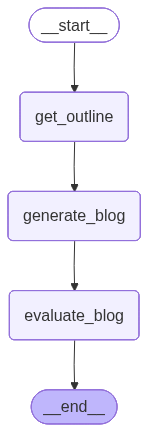

In [21]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())